# **Análisis Exploratorio de Datos**
*Fuente del datasource*: [Dementia patient health and prescriptions dataset.](https://www.kaggle.com/datasets/kaggler2412/dementia-patient-health-and-prescriptions-dataset/data?select=dementia_patients_health_data.csv)

### **Sobre el dataset**:

Este conjunto de datos sirve como una fuente rica para el análisis, ofreciendo una visión multifacética de los factores que pueden contribuir al inicio y la progresión de la demencia.

Es un recurso valioso para los investigadores que buscan explorar la compleja interacción entre el estilo de vida, la genética y los resultados de salud. 

Proviene de PUBMED, fuentes de investigación en línea, el NHS, Google Scholar y la consulta con profesionales de la salud.

### **Diccionario**
**Diabetic** (Binary): Indica si un paciente ha sido diagnosticado con diabetes (1 para sí, 0 para no).

**Alcohol Level** (Continuous): Mide el nivel de consumo de alcohol de los pacientes, posiblemente reflejando elecciones de estilo de vida.

**Heart Rate** (Continuous): Denota el número de latidos por minuto, un indicador crítico de la salud cardiovascular.

**Blood Oxygen Level** (Continuous): La saturación de oxígeno en la sangre, un signo vital de la función respiratoria.

**Body Temperature** (Continuous): La temperatura medida del cuerpo en grados Celsius, que indica fiebre potencial o hipotermia.

**Weight** (Continuous): La masa del paciente en kilogramos, una medida fundamental de salud.

**MRI Delay** (Continuous): El tiempo de retraso en obtener una exploración de MRI, potencialmente indicativo de la progresión o gravedad de condiciones médicas.

**Prescription**: El medicamento específico recetado al paciente, relevante para el análisis de tratamientos.

**Dosage in mg** (Continuous): La cantidad de medicamento prescrita, crítica para estudios de dosis-efecto.

**Age** (Continuous): La edad del paciente, un factor demográfico esencial.

**Education_Level**: El nivel más alto de educación alcanzado por el paciente, que puede correlacionarse con la alfabetización en salud.

**Dominant_Hand**: Indica la mano dominante del paciente, que podría relacionarse con funciones neurológicas.

**Gender**: El género del paciente, una característica demográfica clave.

**Family_History**: Indica una historia familiar de demencia, un factor de riesgo significativo.

**Smoking_Status**: Refleja los hábitos de consumo de tabaco del paciente, un indicador importante del estilo de vida.

**APOE_ε4**: Muestra la presencia del alelo APOE ε4, una variante genética asociada con la enfermedad de Alzheimer.

**Physical_Activity**: El nivel de actividad física del paciente, destacando los impactos del estilo de vida en la salud.

**Depression_Status**: Indica si el paciente tiene depresión, que puede estar relacionada con la salud cognitiva.

**Cognitive_Test_Scores** (Continuous): Puntuaciones de pruebas cognitivas, medidas directas de la función cognitiva.

**Medication_History**: Registra si el paciente tiene un historial de uso de medicamentos, relevante para interacciones medicamentosas.

**Nutrition_Diet**: Describe la dieta del paciente, un factor importante de salud.

**Sleep_Quality**: Evalúa la calidad del sueño del paciente, un aspecto crítico de la salud.

**Chronic_Health_Conditions**: Nota cualquier condición de salud crónica que tenga el paciente, clave para estudios de comorbilidad.

**Dementia** (Binary): Sirve como la variable objetivo, indicando la presencia (1) o ausencia (0) de demencia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
import re

def to_snake_case(input_string):
    """
    Function to convert words to snake case.
    Replace spaces and hyphens with underscores and remove special characters.
    """
    # Replace hyphens with underscores
    clean_string = re.sub(r'-', '_', input_string)
    # Replace special characters with nothing (i.e., remove them)
    clean_string = re.sub(r'[^a-zA-Z0-9\s_]', '', clean_string)
    # Replace spaces with underscores
    clean_string = re.sub(r'\s+', '_', clean_string)
    # Convert to lower case
    clean_string = clean_string.lower()
    return clean_string

# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Lectura de datos
df = pd.read_csv("C:/Users/USER/Downloads/dementia_patients_health_data.csv")

# Creando nuevo dataframe para futuras modificaciones.
m_df = df.copy()


---
### Dataframe Info:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               485 non-null    object 
 8   Dosage in mg               485 non-null    float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

---
### **Data cleaning**

**Level 1: Clean up the table**
 - A standard data structure.
 - Attributes have intuitive and codable names.
 - Rows have a unique identifier.

In [3]:

# Preparando columnas codificables.
renamed_columns = {
    'AlcoholLevel': 'alcohol_level',
    'HeartRate': 'heart_rate',
    'BloodOxygenLevel': 'blood_oxygen_level',
    'BodyTemperature': 'body_temperature',
}

# Renombrando columnas
m_df.rename(columns=renamed_columns, inplace=True)
m_df.columns = [to_snake_case(col) for col in m_df.columns]
print(f"Columnas renombradas:\n{m_df.columns.to_list()}\n")

# Filtrar dataset para mostrar solo filas duplicadas.
df_duplicates = m_df[m_df.duplicated(keep=False)]

print(f"¿Existen valores duplicados?:\n{(not df_duplicates.empty)}\n")


Columnas renombradas:
['diabetic', 'alcohol_level', 'heart_rate', 'blood_oxygen_level', 'body_temperature', 'weight', 'mri_delay', 'prescription', 'dosage_in_mg', 'age', 'education_level', 'dominant_hand', 'gender', 'family_history', 'smoking_status', 'apoe_4', 'physical_activity', 'depression_status', 'cognitive_test_scores', 'medication_history', 'nutrition_diet', 'sleep_quality', 'chronic_health_conditions', 'dementia']

¿Existen valores duplicados?:
False



---
**Level 2: Restructuring and reformulating the table**
 - Change data structure, restructure the dataset.

*En este caso, consideramos que la estructura inicial del dataset es correcta.*

---
**Level 3: Evaluating and correcting the values**
 - Deal with data errors.
 - Deal with missing values.
 - Detect and handle outliers.

### **Missing values**:

Number of missing values:
prescription: 515
dosage_in_mg: 515
chronic_health_conditions: 179


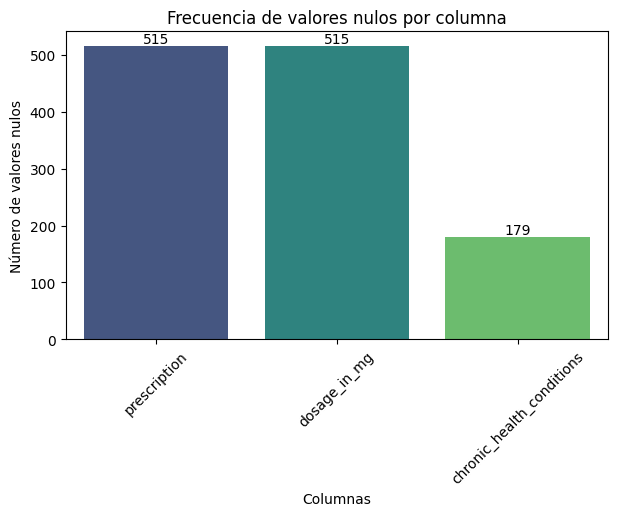

In [4]:
# Imprimiendo columnas con missing values.
print('Number of missing values:')
for col in m_df.columns:
    n_mv = sum(m_df[col].isna())
    if n_mv > 0:
        print(f"{col}: {n_mv}")

# Graficando frecuencia de valores nulos para columnas con valores nulos.
## Filtrar columnas que tienen valores nulos
columns_with_null = m_df.columns[m_df.isnull().any()]

## Contar valores nulos en las columnas seleccionadas
null_counts = m_df[columns_with_null].isnull().sum().reset_index()
null_counts.columns = ['Columnas', 'Número de valores nulos']

## Crear barplot
plt.figure(figsize=(7, 4))
sns.barplot(data=null_counts, x='Columnas', y='Número de valores nulos', palette='viridis', hue='Columnas', legend=False)

## Añadir etiquetas de los valores nulos en las barras
for index, row in null_counts.iterrows():
    plt.text(index, row['Número de valores nulos'], row['Número de valores nulos'], 
             color='black', ha="center", va="bottom")

plt.title('Frecuencia de valores nulos por columna')
plt.xticks(rotation=45)
plt.ylabel('Número de valores nulos')
plt.xlabel('Columnas')
plt.show()

In [5]:
# Análisis de missing values.

## Obtener columnas con valores nulos
null_columns = m_df.columns[df.isnull().any()].to_list()
print(f"Columnas con valores nulos:\n{null_columns}\n")

## Verificar si hay dosis nulas donde hay prescripción
missing_dosage = m_df[m_df['prescription'].notnull() & m_df['dosage_in_mg'].isnull()]
print(f"¿Existen dosis nulas en caso de prescripción?:\n{(not missing_dosage.empty)}")

## Reemplazo valores nulos para chronic_health_conditions con el valor "None".
m_df['chronic_health_conditions'] = m_df['chronic_health_conditions'].fillna('None')

## Reemplazo valores nulos por None
m_df['prescription'] = m_df['prescription'].fillna('None')

## Convierto valores binarios numéricos en categóricos.
m_df.replace({'diabetic': {1: 'Yes', 0: 'No'}}, inplace=True)
m_df.replace({'dementia': {1: 'Yes', 0: 'No'}}, inplace=True)

Columnas con valores nulos:
['prescription', 'dosage_in_mg', 'chronic_health_conditions']

¿Existen dosis nulas en caso de prescripción?:
False


### **Observaciones**:

**Missing values**:
- prescription
- dosage_in_mg
- chronic_health_conditions

Considerando que no existen dosis nulas en caso de prescripción, entendemos que los valores nulos corresponden al caso de no prescripción.

También consideramos que en caso de valor nulo para **chronic_health_conditions**, el individuo no presenta ninguna condición crónica.

Es por esto que tomamos la decisión de:
- Convertir los valores nulos a 'None' en el caso de **prescription** y **chronic_health_conditions**
- Dejar los valores nulos en el caso de **dosage_in_mg**, para evitar que agregar algún valor nos genere ruido a la hora de realizar estadísticas.

Por otro lado, convertimos los valores numéricos binarios 1 y 0 de los atributos **diabetic** y **dementia** en categóricos 'Yes' y 'No', respectivamente.

---
### **Outliers**:

### Univariate outlier detection:

In [6]:
def create_interactive_boxplot(dataframe):
    # Excluir columnas categóricas y binarias
    non_categorical_columns = dataframe.select_dtypes(exclude=['object']).columns
    non_categorical_and_binary_columns = [col for col in non_categorical_columns if dataframe[col].nunique() > 2]

    # Function to update the plot dynamically
    def update_plot(selected_column):

        plt.figure(figsize=(8, 5))
        sns.boxplot(x=dataframe[selected_column])
        plt.xlabel(selected_column)
        plt.title(f"Boxplot for attribute {selected_column}")
        plt.show()

    # Create the dropdowns for user selection
    column_dropdown = ipywidgets.Dropdown(
        options=non_categorical_and_binary_columns,
        description='Columna',
        value=non_categorical_and_binary_columns[0]  # Default value
    )

    # Create the interactive widgets
    interactive_plot = ipywidgets.interactive(
        update_plot,
        dataframe=ipywidgets.fixed(dataframe),
        selected_column=column_dropdown
    )

    display(interactive_plot)

def create_interactive_countplot(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns

    def update_plot(selected_column):

        plt.figure(figsize=(8,5))
        sns.countplot(dataframe, x=selected_column)
        plt.xlabel(selected_column)
        
        plt.title(f"Countplot for attribute {selected_column}")
        plt.show()

    column_dropdown = ipywidgets.Dropdown(
        options=categorical_columns,
        description='Columna',
        value=categorical_columns[0] # Default value
    )

    interactive_plot = ipywidgets.interactive(
        update_plot,
        dataframe=ipywidgets.fixed(dataframe),
        selected_column=column_dropdown
    )

    display(interactive_plot)

# Univariate outlier detection.
## Columnas numéricas
create_interactive_boxplot(m_df)

## Columnas categóricas
create_interactive_countplot(m_df)


interactive(children=(Dropdown(description='Columna', options=('alcohol_level', 'heart_rate', 'blood_oxygen_le…

interactive(children=(Dropdown(description='Columna', options=('diabetic', 'prescription', 'education_level', …

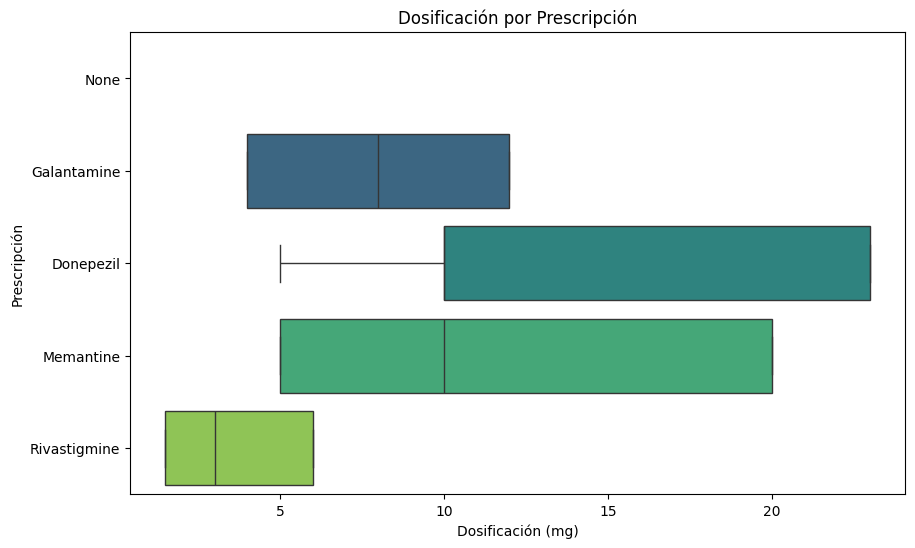

In [7]:
# Boxplot Dosificación por prescripción. Para analizar outliers en atributo dosage_in_mg.
plt.figure(figsize=(10, 6))
sns.boxplot(y='prescription', x='dosage_in_mg', data=m_df, palette='viridis', hue='prescription', legend=False)
plt.title('Dosificación por Prescripción')
plt.ylabel('Prescripción')
plt.xlabel('Dosificación (mg)')
plt.show()

### Bivariate outlier detection:


In [8]:
# Para atributos numérico-numérico, es conveniente usar scatterplot
def create_interactive_scatterplot(dataframe):
    numerical_columns = dataframe.select_dtypes(exclude=['object']).columns

    def update_plot(selected_xcolumn, selected_ycolumn):

        plt.figure(figsize=(8,5))
        sns.scatterplot(data=dataframe, x=selected_xcolumn, y=selected_ycolumn)
        plt.xlabel(selected_xcolumn)
        plt.ylabel(selected_ycolumn)
        plt.title(f"Scatterplot for attributes {selected_xcolumn} and {selected_ycolumn}")
        plt.grid(True)
        plt.show()

    column_xdropdown = ipywidgets.Dropdown(
        options=numerical_columns,
        description='Columna',
        value=numerical_columns[0] # Default value
    )

    column_ydropdown = ipywidgets.Dropdown(
        options=numerical_columns,
        description='Columna',
        value=numerical_columns[1] # Default value
    )

    interactive_plot = ipywidgets.interactive(
        update_plot,
        dataframe=ipywidgets.fixed(dataframe),
        selected_xcolumn=column_xdropdown,
        selected_ycolumn=column_ydropdown
    )

    display(interactive_plot)

# Para atributos categórico-numérico, es conveniente usar múltiples boxplots.
def create_interactive_boxplots(dataframe):
    # Obtener columnas categóricas y numéricas
    categorical_columns = dataframe.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = dataframe.select_dtypes(exclude=['object']).columns.tolist()

    def update_boxplots(selected_categorical_column, selected_numerical_columns):
        plt.figure(figsize=(12, 6))
        for i, num_col in enumerate(selected_numerical_columns):
            plt.subplot(1, len(selected_numerical_columns), i + 1)
            sns.boxplot(data=dataframe, y=selected_categorical_column, x=num_col)
            plt.title(f'Boxplot of {num_col} by {selected_categorical_column}')
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    column_categorical_dropdown = ipywidgets.Dropdown(
        options=categorical_columns,
        description='Categorical',
        value=categorical_columns[0]  # Valor por defecto
    )

    column_numerical_multiselect = ipywidgets.SelectMultiple(
        options=numerical_columns,
        description='Numerical',
        value=(numerical_columns[0],),  # Valor por defecto
        disabled=False
    )

    interactive_plot = ipywidgets.interactive(
        update_boxplots,
        selected_categorical_column=column_categorical_dropdown,
        selected_numerical_columns=column_numerical_multiselect
    )

    display(interactive_plot)

# Para atributos categórico-categórico, es conveniente usar una tabla de contingencia color-coded 
def create_interactive_crosstab(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns

    def update_crosstab(selected_col1, selected_col2):
        # Calcular la tabla de contingencia
        crosstab = pd.crosstab(dataframe[selected_col1], dataframe[selected_col2])
        
        plt.figure(figsize=(10, 6))
        sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', cbar=True, square=True)
        plt.title(f"Color-coded Contingency Table for {selected_col1} and {selected_col2}")
        plt.xlabel(selected_col2)
        plt.ylabel(selected_col1)
        plt.show()

    col1_dropdown = ipywidgets.Dropdown(
        options=categorical_columns,
        description='Columna 1',
        value=categorical_columns[0]  # Valor por defecto
    )

    col2_dropdown = ipywidgets.Dropdown(
        options=categorical_columns,
        description='Columna 2',
        value=categorical_columns[1]  # Valor por defecto
    )

    interactive_crosstab = ipywidgets.interactive(
        update_crosstab,
        selected_col1=col1_dropdown,
        selected_col2=col2_dropdown
    )

    display(interactive_crosstab)

create_interactive_scatterplot(m_df)
create_interactive_boxplots(m_df)
create_interactive_crosstab(m_df)

interactive(children=(Dropdown(description='Columna', options=('alcohol_level', 'heart_rate', 'blood_oxygen_le…

interactive(children=(Dropdown(description='Categorical', options=('diabetic', 'prescription', 'education_leve…

interactive(children=(Dropdown(description='Columna 1', options=('diabetic', 'prescription', 'education_level'…

In [9]:
def create_interactive_crosstab(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns

    def update_crosstab(selected_col1, selected_col2):
        # Calcular la tabla de contingencia
        crosstab = pd.crosstab(dataframe[selected_col1], dataframe[selected_col2])
        
        plt.figure(figsize=(10, 6))
        sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', cbar=True, square=True)
        plt.title(f"Color-coded Contingency Table for {selected_col1} and {selected_col2}")
        plt.xlabel(selected_col2)
        plt.ylabel(selected_col1)
        plt.show()

    col1_dropdown = ipywidgets.Dropdown(
        options=categorical_columns,
        description='Columna 1',
        value=categorical_columns[0]  # Valor por defecto
    )

    col2_dropdown = ipywidgets.Dropdown(
        options=categorical_columns,
        description='Columna 2',
        value=categorical_columns[1]  # Valor por defecto
    )

    interactive_crosstab = ipywidgets.interactive(
        update_crosstab,
        selected_col1=col1_dropdown,
        selected_col2=col2_dropdown
    )

    display(interactive_crosstab)

### **Observaciones**:

**Outliers**:

***Univariate outlier detection***:
- dosage_in_mg
 
*Solo se registran outliers para el atributo **dosage_in_mg**.*

*En este caso los outliers no parecen ser valores erroneos, dado que en relación con el atributo **prescription**, parece estar dentro de los valores esperados para la prescripción de "Donepezil".*

***Bivariate Outlier detection***:

*No se registran outliers.*



---
#### **Pearson correlation**

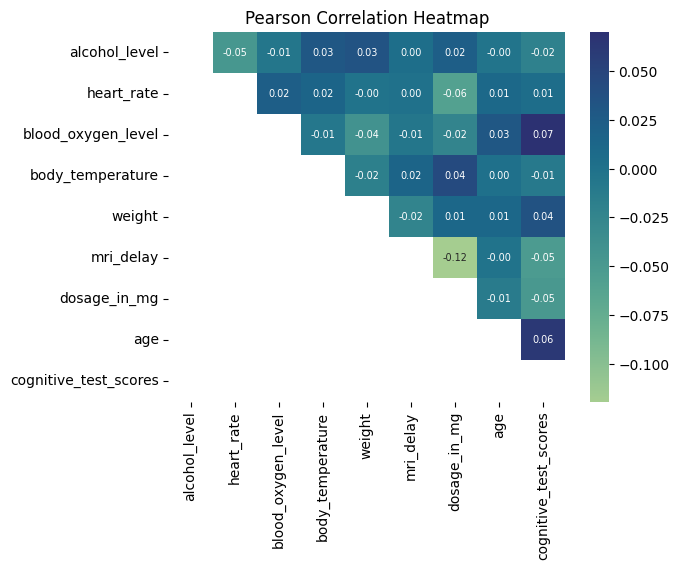

In [10]:
# Obtengo columnas numéricas para aplicar corr() function.
corr_df = m_df.select_dtypes(include=[float, int]).corr()

# Creo una máscara para imprimir solo el triangulo superior.
mask = np.tril(np.ones_like(corr_df, dtype=bool))

sns.heatmap(corr_df, mask=mask, cmap="crest", annot=True, fmt=".2f", annot_kws={'size': 'x-small'})
plt.title('Pearson Correlation Heatmap')
plt.show()

### **Observaciones**:

**Pearson correlation**:

La tabla de calor para la correlación de Pearson indica:
- Existe una correlación negativa entre **dementia** y **cognitive_test_scores**
- Existe una correlación positiva entre **dementia** y **dosage_in_mg**
- Existe una correlación negativa menor entre **dosage_in_mg** y **cognitive_test_scores**
